## 1. 라이브러리 및 데이터 불러오기

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import missingno as msno

import warnings
warnings.filterwarnings('ignore')



# plt.rc('font', family='AppleGothic')
plt.rc('font', family='Malgun Gothic')



# 맥 폰트 

plt.rcParams['axes.unicode_minus'] = False


# 데이터셋 분할 & 교차검증 & 하이퍼파라미터 튜닝 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# 데이터 전처리 (인코딩, 표준화, 정규화)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 모델링
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# 성능지표 
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, classification_report

In [81]:
train_data = pd.read_csv('train.csv')

# 테스트용 데이터 불러오기 
test_data = pd.read_csv('test.csv')

# 제출용 데이터 불러오기 
submission_data = pd.read_csv('submission.csv', index_col=0)

### 1) 변수 소개

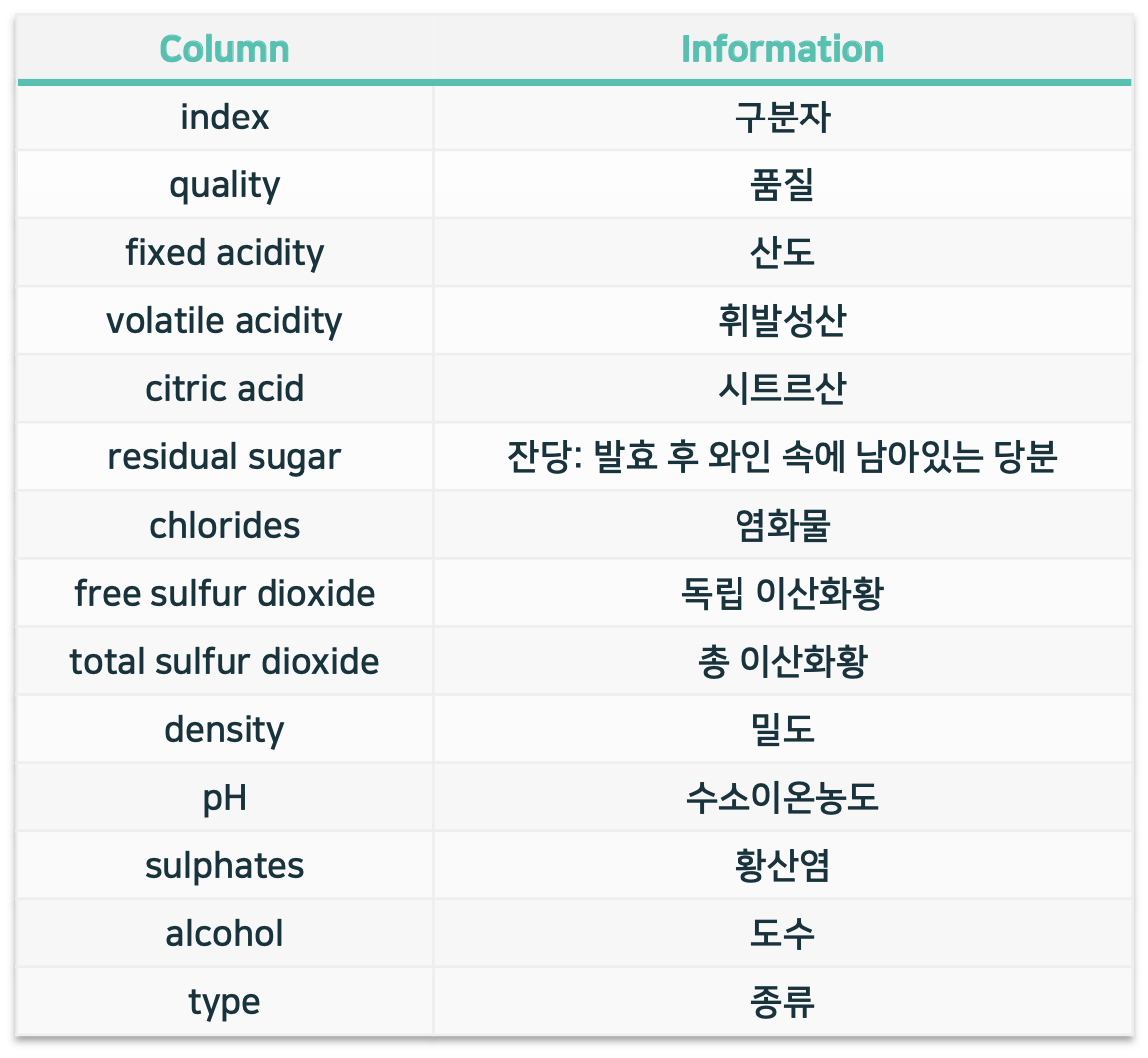

### 2) 데이터 확인

In [3]:
train_data.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
test_data.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [5]:
print('train_data shape : {}'.format(train_data.shape))
print('train_data의 결측치 : {}'.format(sum(train_data.isna().sum())))
print('test_data shape : {}'.format(test_data.shape))
print('test_data의 결측치 : {}'.format(sum(test_data.isna().sum())))

train_data shape : (5497, 14)
train_data의 결측치 : 0
test_data shape : (1000, 13)
test_data의 결측치 : 0


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


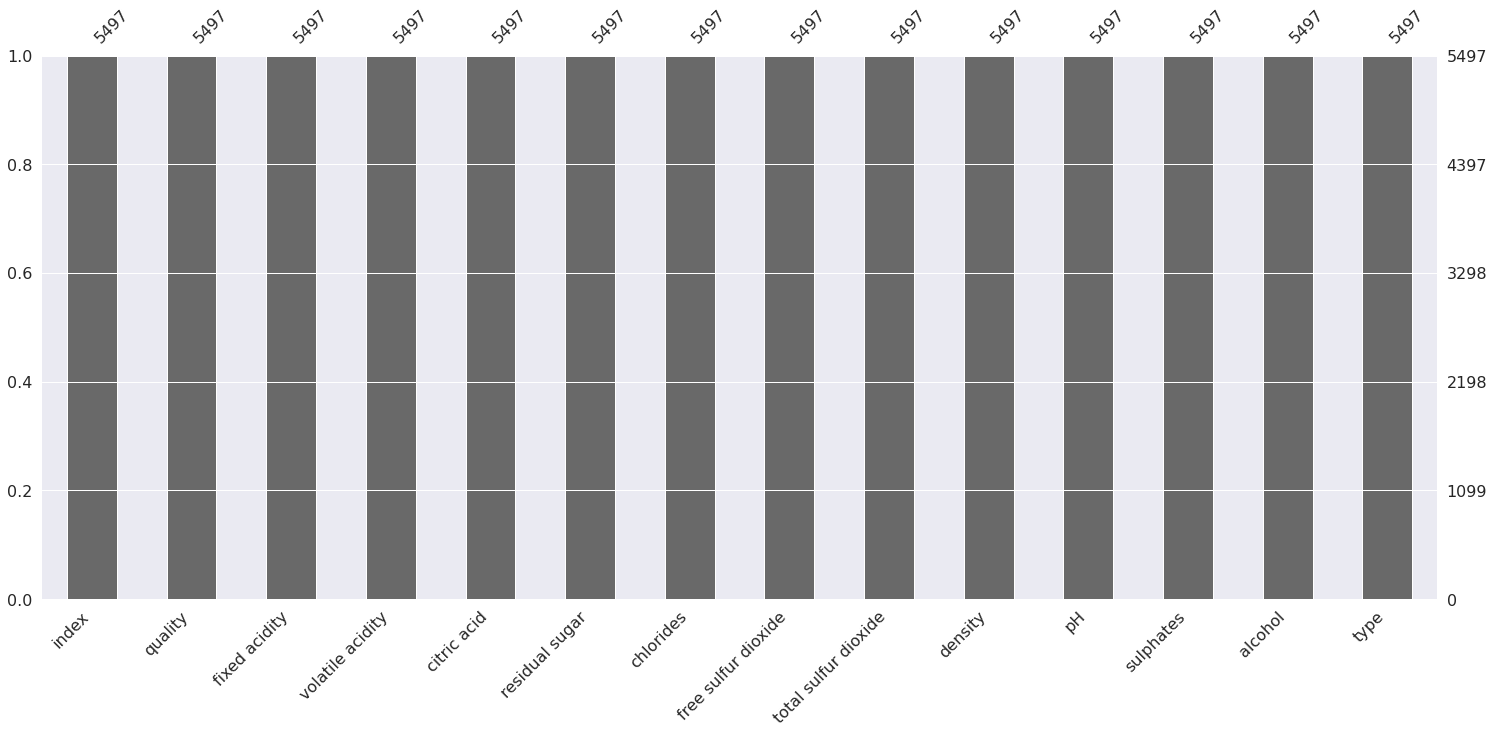

In [6]:
msno.bar(train_data)
plt.show()

- train 데이터는 5497개의 행과 14개의 열로 구성되어 있다.
- 결측치가 존재하지 않는다. 

In [7]:
train_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5492    False
5493    False
5494    False
5495    False
5496    False
Length: 5497, dtype: bool

In [8]:
print(f'train_data 중복값: {train_data.duplicated().sum()}, ({np.round(100*train_data.duplicated().sum()/len(train_data),1)}%)')
print('')
print(f'test_data 중복값: {test_data.duplicated().sum()}, ({np.round(100*test_data.duplicated().sum()/len(test_data),1)}%)')

train_data 중복값: 0, (0.0%)

test_data 중복값: 0, (0.0%)


- 중복된 값이 존재하지 않는다. 

In [9]:
print(f'Print the columns in the given dataset: \n{train_data.columns}')

Print the columns in the given dataset: 
Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')


In [10]:
# 변수명 및 변수타입 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [11]:
numerical_feats = list(train_data.select_dtypes(exclude='object'))

print('Dataset의 수치형 변수는 총 {}개 입니다.'.format(len(numerical_feats)))


cat_feats = list(train_data.select_dtypes(include='object'))

print('Dataset의 범주형 변수는 총 {}개 입니다.'.format(len(cat_feats)))

Dataset의 수치형 변수는 총 13개 입니다.
Dataset의 범주형 변수는 총 1개 입니다.


- train_data에는 총 14개의 변수가 존재하며, 수치형 변수는 13개, 범주형 변수는 1개로 구성되어 있다. 

---
## 2. EDA(탐색적 데이터 분석)

### 1) 기술 통계량 확인

In [12]:
train_data.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [13]:
test_data.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693
std,288.819436,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694
min,0.000000,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000
25%,249.750000,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000
50%,499.500000,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000
75%,749.250000,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000
max,999.000000,15.600000,1.240000,0.810000,22.60000,0.611000,122.500000,289.000000,1.003150,3.780000,1.310000,14.000000


- 대체적으로 표준분산이 높은 변수들이 적으며, total sulfur dioxide	변수가 가장 표준편차가 높다

- 히트맵

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


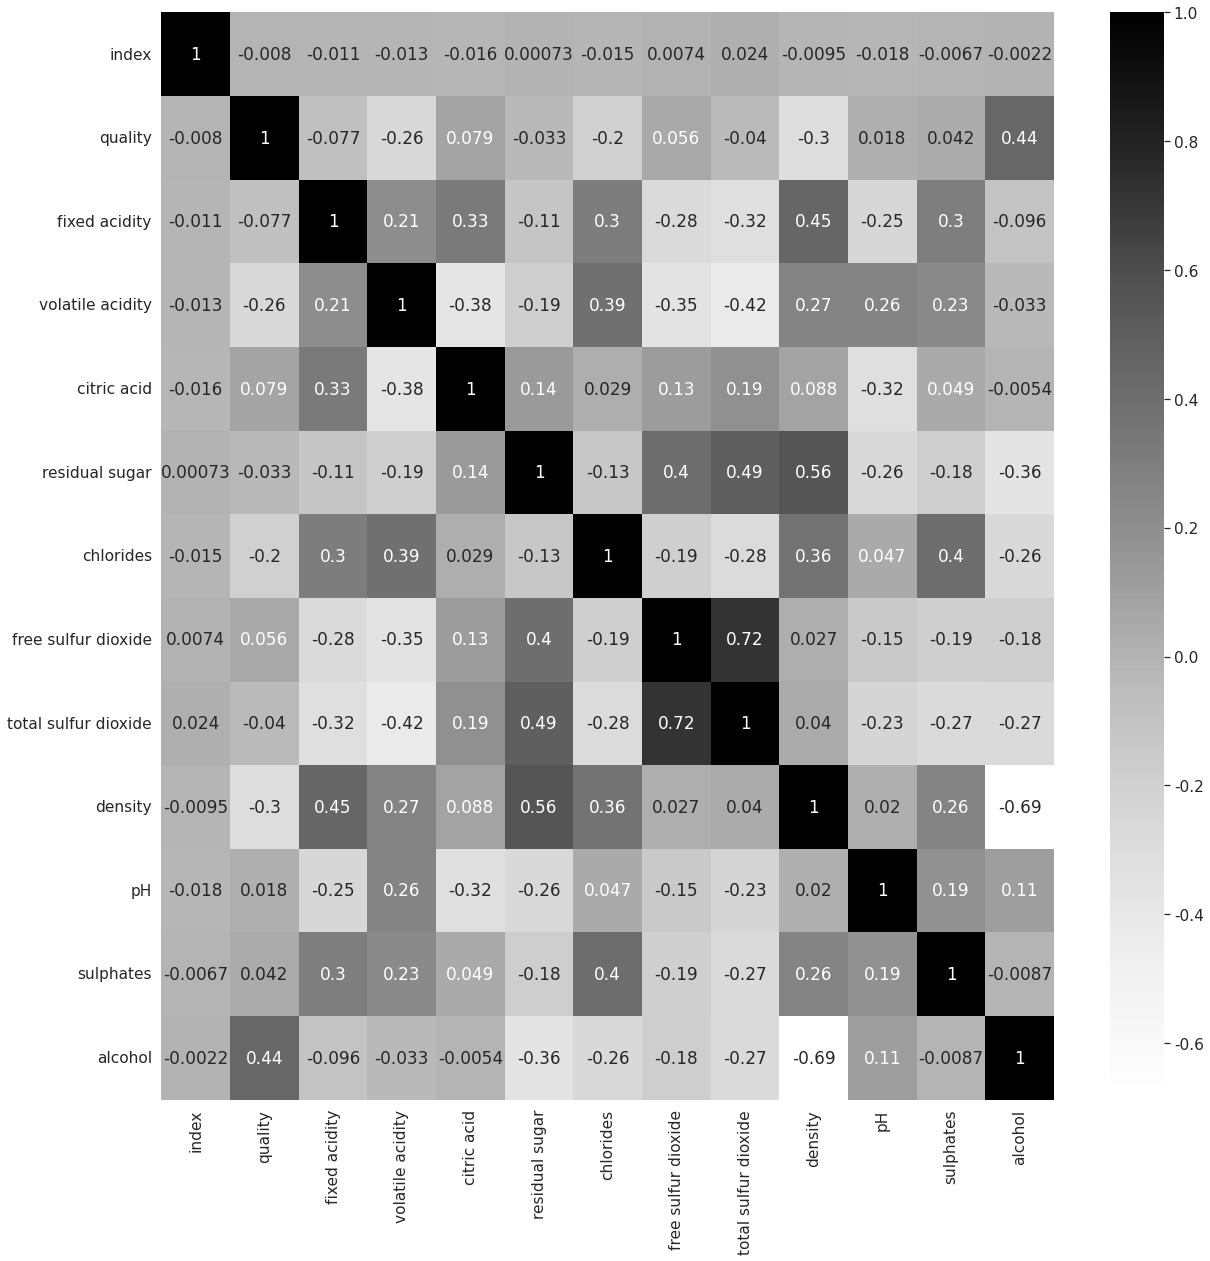

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_data[numerical_feats].corr(), annot=True, cmap='Greys')
plt.show()

- total sulfur dioxide와 free sulfur dioxide 변수의 상관계수가 0.72로 매우 높은 수치를 보여준다. -> 둘다 이산화황이며 독립과 총으로만 구분했기 때문에 상관관계가 높다고 볼 수 있다.

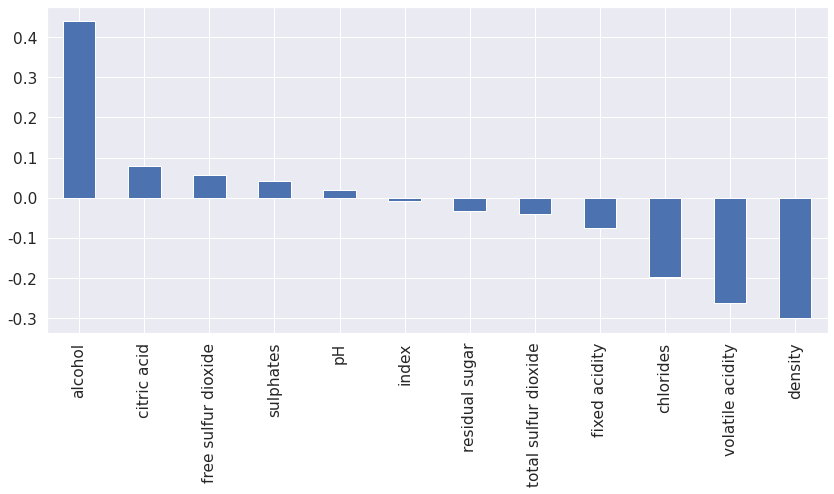

In [15]:
plt.figure(figsize=(14,6))
corr = train_data.corr()['quality'].sort_values(ascending=False)
corr.drop('quality').plot(kind='bar')
plt.show()

In [16]:
corr

quality                 1.000000
alcohol                 0.439615
citric acid             0.079157
free sulfur dioxide     0.055574
sulphates               0.042068
pH                      0.017931
index                  -0.008045
residual sugar         -0.032848
total sulfur dioxide   -0.039732
fixed acidity          -0.076506
chlorides              -0.198148
volatile acidity       -0.261557
density                -0.299831
Name: quality, dtype: float64

- 타겟변수인 quality 변수와 양의 상관관계가 높은 변수는 alcohol이며, 음의 상관관계가 높은 변수는 density이다.   
-매우 낮은 상관관계를 보여주는 pH, residual sugar,total sulfur dioxide 변수는 삭제하자

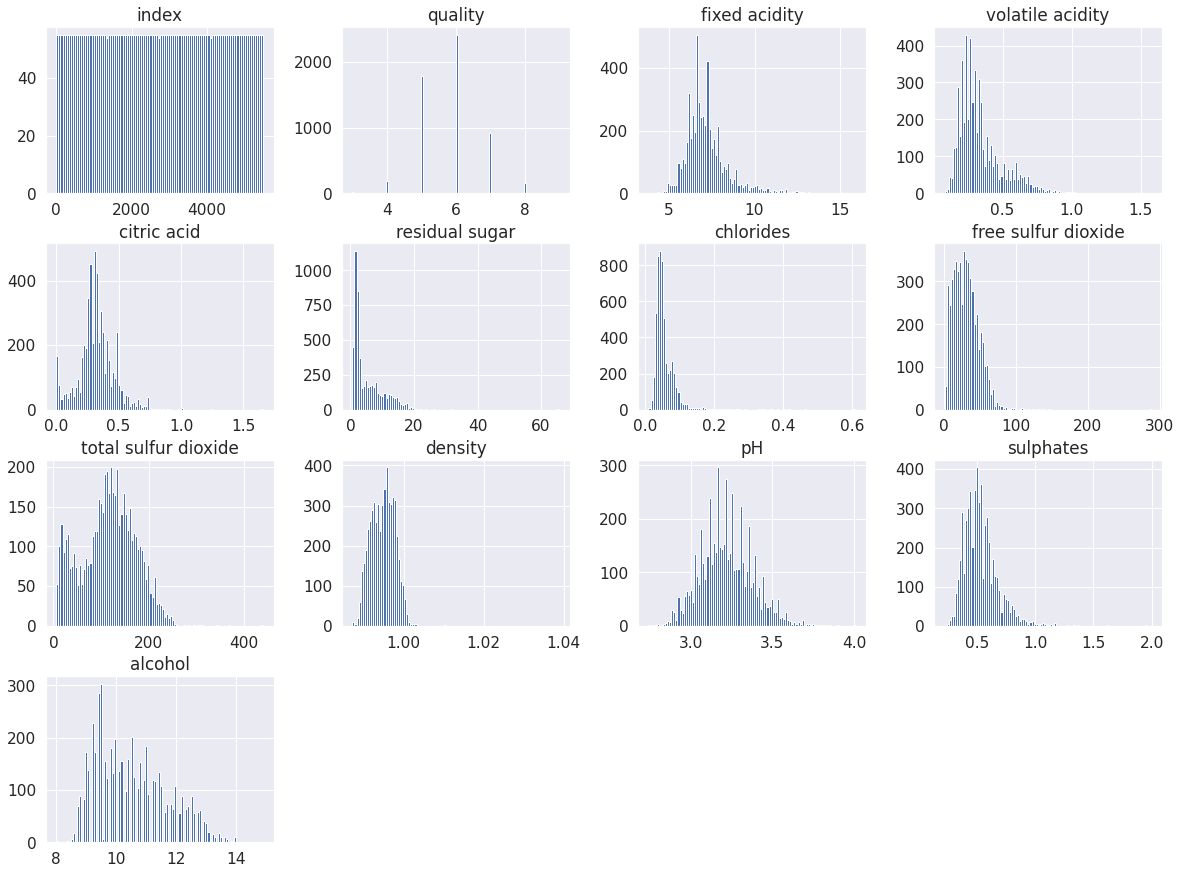

In [17]:
train_data.hist(bins = 100, figsize = (20,15))
plt.show()

-  pH, residual sugar,total sulfur dioxide  변수를 제외하고는 값들이 크게 한쪽으로 치우치지 않은 것을 알 수 있다. 

### 2) 타겟 변수(quality)

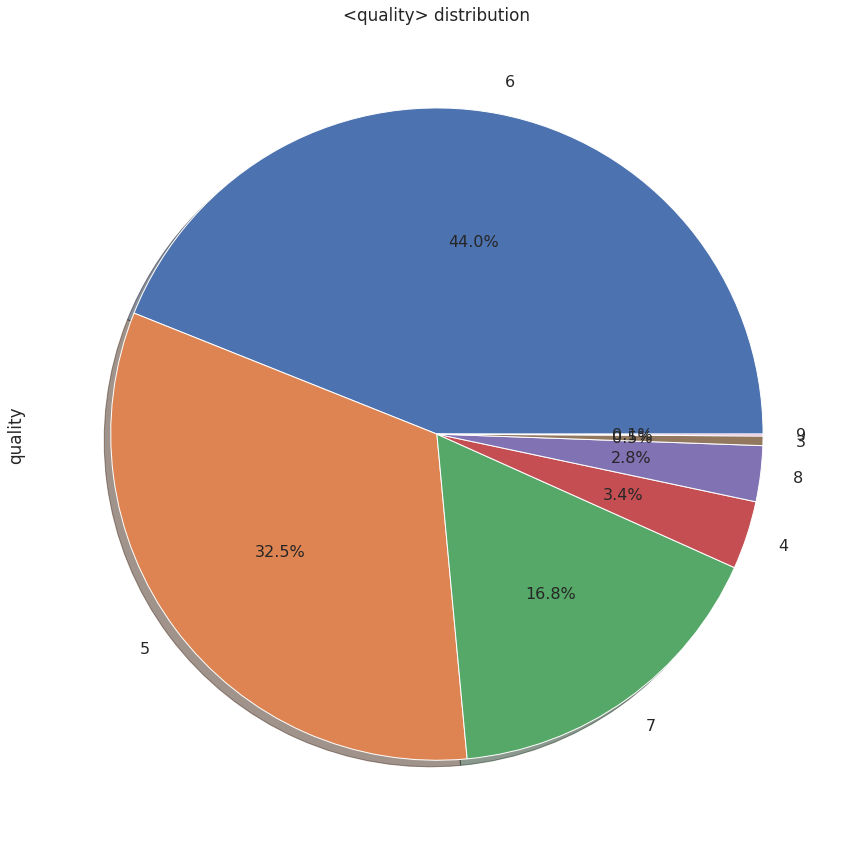

In [18]:
plt.figure(figsize=(15,15))

train_data['quality'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("<quality> distribution")
plt.show()

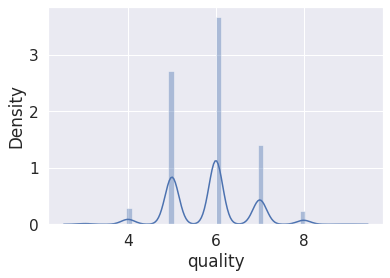

In [19]:
sns.distplot(train_data['quality'])
plt.show()

- 전체적으로 와인의 점수가 6점과 5점이 대다수이며, 9점 이상의 높은 점수를 받은 비율이 적은 것을 알 수 있다. 

### 3) 수치형 변수

- 대다수의 수치형 변수들이 정규 분포의 모습을 보이지 않으므로 변환을 해주어야 한다.

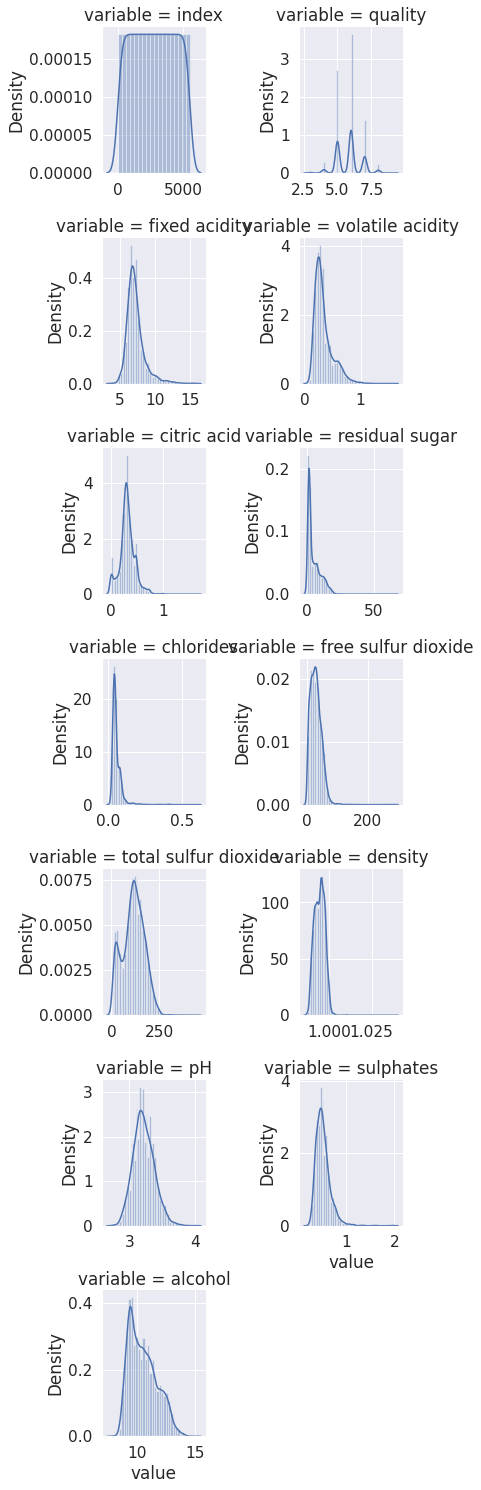

In [20]:
# 다른 수치형 변수들도 확인
f = pd.melt(train_data, value_vars=numerical_feats)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### 4) 범주형 변수

In [21]:
def plot_cat(feature):
    sns.countplot(data=train_data,x=feature)
    ax=sns.countplot(data=train_data,x=feature)
   

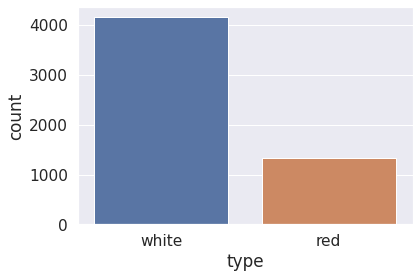

In [22]:
plot_cat('type')

- 대체적으로 화이트 와인의 데이터가 더 많다.

---
## 3. 데이터 전처리 및 변수 선택

### 1) 변수 선택 및 불필요한 변수 제거 

In [23]:
# 모델에 돌리지 않을 변수 삭제
def drop_features(df):
    df.drop(['index', 'pH', 'residual sugar','total sulfur dioxide'], axis=1, inplace=True)
    return df

X = drop_features(train_data).drop('quality', axis=1)
X_test = drop_features(test_data)

y = train_data['quality']

In [24]:
numerical_feats = list(X.select_dtypes(exclude='object'))

In [25]:
numerical_feats

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

### 2) 로그변환

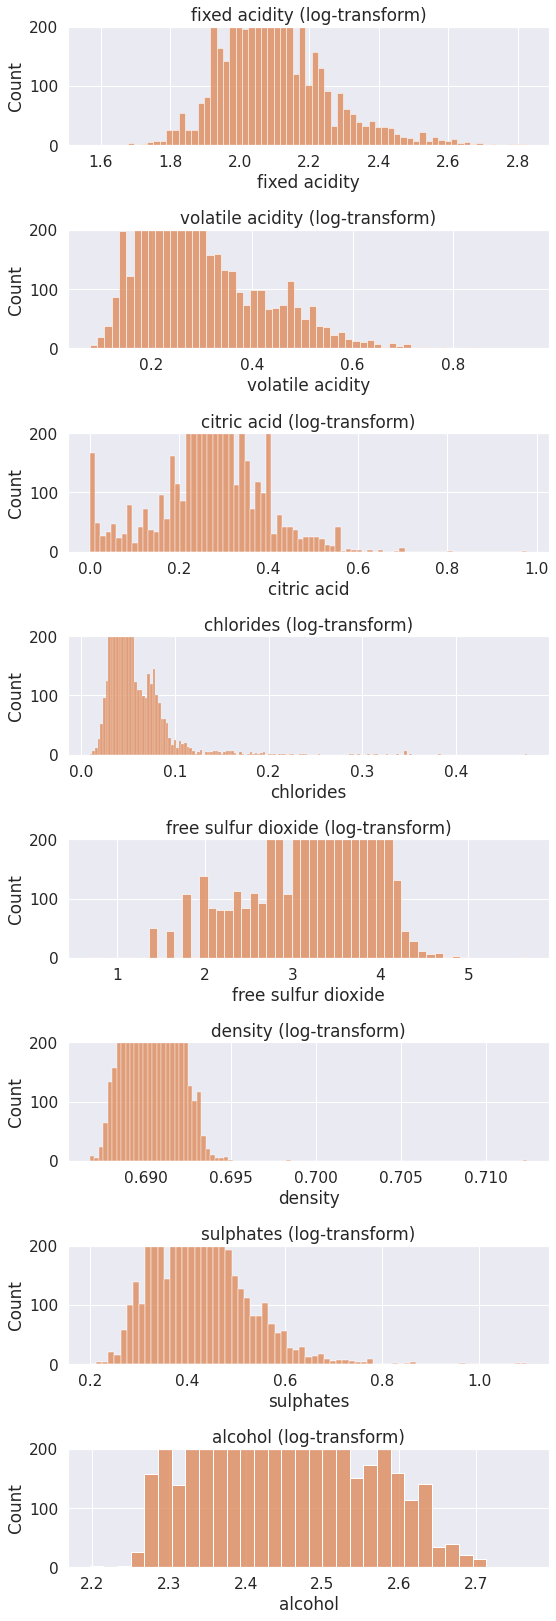

In [26]:
#  치우친 분포가 몇몇 있어서 모두 로그변환 해준다. 
fig=plt.figure(figsize=(15,25))
for i, col in enumerate(numerical_feats):
    plt.subplot(9,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()

In [27]:
# 로그변환 적용
for col in numerical_feats:
    X[col]=np.log1p(X[col])
    X_test[col]=np.log1p(X_test[col])

### 3) 범주형 변수 인코딩

In [28]:
# 원핫 인코딩
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [29]:
# 학습 데이터 내부에서 검증 데이터 셋 생성
# 생존 여부 클래스가 0이 더 많기 때문에 균등하게 나눠주기 위해 stratify 옵션 적용
X_train, X_test_1, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=11)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test_1.shape, y_test.shape)

(4397, 10) (4397,)
(1100, 10) (1100,)


---
## 4. 모델링

In [54]:
# 성능 지표 나타내주는 함수 구현 
def get_clf_eval(y_test, pred):

    accuracy = accuracy_score(y_test, pred)

    print('정확도: {0:.4f},'.format(accuracy,))

In [56]:
# 모델과 학습/테스트 데이터 세트를 입력하면 성능, 평가 수치를 반환 
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###', model.__class__.__name__, '###')
    get_clf_eval(y_test, pred)
    print()

In [57]:
# 결정트리, Random Forest, 로지스틱 회귀, light_gbm, xgb_clf, Knn, SVC를 위한 사이킷런 Classifier 클래스 생성 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)
lgbm_clf = LGBMClassifier(random_state=11)
knn_clf = KNeighborsClassifier()
svc_clf = SVC(random_state=11)
models = [dt_clf, rf_clf, lr_clf, lgbm_clf, knn_clf, svc_clf]

for model in models:
    get_model_predict(model, X_train, X_test_1, y_train, y_test)

### DecisionTreeClassifier ###
정확도: 0.5891,

### RandomForestClassifier ###
정확도: 0.6609,

### LogisticRegression ###
정확도: 0.5373,

### LGBMClassifier ###
정확도: 0.6409,

### KNeighborsClassifier ###
정확도: 0.5182,

### SVC ###
정확도: 0.5118,



- 랜덤 포레스트 모델과, LightGBM 모델의 성능이 가장 높게 나온다. 

---
## 5. 교차 검증

In [59]:
def cross_score(model, x, y):
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=5)
    print('###', model.__class__.__name__, '###')
    for iter_count, accuracy in enumerate(scores):

        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    print('평균 정확도: {0:.4f}'.format(np.mean(scores)))
    print()

In [60]:
for model in models:
    cross_score(model, X, y)

### DecisionTreeClassifier ###
교차 검증 0 정확도: 0.5973
교차 검증 1 정확도: 0.5873
교차 검증 2 정확도: 0.5732
교차 검증 3 정확도: 0.5560
교차 검증 4 정확도: 0.5778
평균 정확도: 0.5783

### RandomForestClassifier ###
교차 검증 0 정확도: 0.6800
교차 검증 1 정확도: 0.6645
교차 검증 2 정확도: 0.6633
교차 검증 3 정확도: 0.6551
교차 검증 4 정확도: 0.6597
평균 정확도: 0.6645

### LogisticRegression ###
교차 검증 0 정확도: 0.5336
교차 검증 1 정확도: 0.5382
교차 검증 2 정확도: 0.5287
교차 검증 3 정확도: 0.5077
교차 검증 4 정확도: 0.5196
평균 정확도: 0.5256

### LGBMClassifier ###
교차 검증 0 정확도: 0.6473
교차 검증 1 정확도: 0.6445
교차 검증 2 정확도: 0.6306
교차 검증 3 정확도: 0.6260
교차 검증 4 정확도: 0.6251
평균 정확도: 0.6347

### KNeighborsClassifier ###
교차 검증 0 정확도: 0.5291
교차 검증 1 정확도: 0.5036
교차 검증 2 정확도: 0.5214
교차 검증 3 정확도: 0.5159
교차 검증 4 정확도: 0.5187
평균 정확도: 0.5177

### SVC ###
교차 검증 0 정확도: 0.5227
교차 검증 1 정확도: 0.5100
교차 검증 2 정확도: 0.5305
교차 검증 3 정확도: 0.4795
교차 검증 4 정확도: 0.5177
평균 정확도: 0.5121



- 교차검증 성능이 가장 높게 나온 3개의 모델만 튜닝을 진행해주자. 

---
## 6. 하이퍼파라미터 튜닝

In [62]:
# 모델 비교용 딕셔너리 생성
model_comparison = {}

- 랜덤 포레스트

In [71]:
parameters = {'n_estimators': [160,180,200], 'max_depth':[18,20,22,24]}

rf = RandomForestClassifier()

clf_1 = GridSearchCV(rf, parameters)

clf_1.fit(X_train, y_train)
print(f'최적의 파라미터: {clf_1.best_params_}')

y_pred = clf_1.predict(X_test_1)
model_comparison['RandomForestClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test, y_pred, zero_division=1))

최적의 파라미터: {'max_depth': 20, 'n_estimators': 180}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.75      0.16      0.27        37
           5       0.69      0.68      0.68       358
           6       0.63      0.76      0.69       484
           7       0.70      0.55      0.62       185
           8       0.89      0.27      0.41        30
           9       1.00      0.00      0.00         1

    accuracy                           0.66      1100
   macro avg       0.81      0.35      0.38      1100
weighted avg       0.67      0.66      0.65      1100



- 의사결정나무 

In [70]:
parameters = {'max_depth': [5,10,15,20]}

Tree_model = DecisionTreeClassifier()

clf_2 = GridSearchCV(Tree_model, parameters)

clf_2.fit(X_train, y_train)
print(f'최적의 파라미터: {clf_2.best_params_}')

y_pred = clf_2.predict(X_test_1)
model_comparison['DecisionTreeClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))

최적의 파라미터: {'max_depth': 20}


              precision    recall  f1-score   support

           3       0.25      0.20      0.22         5
           4       0.24      0.22      0.23        37
           5       0.63      0.63      0.63       358
           6       0.61      0.62      0.62       484
           7       0.54      0.52      0.53       185
           8       0.27      0.30      0.29        30
           9       1.00      0.00      0.00         1

    accuracy                           0.58      1100
   macro avg       0.51      0.35      0.36      1100
weighted avg       0.58      0.58      0.58      1100



- LightGBM

In [77]:
parameters = { "n_estimators": [100, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.3]}

Tree_model = LGBMClassifier()

clf_3 = GridSearchCV(Tree_model, parameters)

clf_3.fit(X_train, y_train)
print(f'최적의 파라미터: {clf_3.best_params_}')

y_pred = clf_3.predict(X_test_1)
model_comparison['LGBMClassifier'] = [accuracy_score(y_test,y_pred), f1_score(y_test,y_pred, average='weighted')]
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))

최적의 파라미터: {'learning_rate': 0.05, 'n_estimators': 1000}


              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.50      0.19      0.27        37
           5       0.66      0.68      0.67       358
           6       0.63      0.71      0.66       484
           7       0.64      0.57      0.61       185
           8       0.58      0.23      0.33        30
           9       1.00      0.00      0.00         1

    accuracy                           0.64      1100
   macro avg       0.72      0.34      0.36      1100
weighted avg       0.64      0.64      0.63      1100



- 모델 비교

In [75]:
model_comparison_data = pd.DataFrame.from_dict(model_comparison).T
model_comparison_data.columns = ['Accuracy', 'F1 Score']
model_comparison_data = model_comparison_data.sort_values('F1 Score', ascending=True)
model_comparison_data.style.background_gradient()

,Accuracy,F1 Score
DecisionTreeClassifier,0.581818,0.580828
LGBMClassifier,0.640000,0.630844
RandomForestClassifier,0.661818,0.650254


- 랜덤포레스트가 정확도면에서, F1 Score면에서 가장 높은 성능을 보여줌

---
## 7. 테스트 데이터 예측값 제출

In [83]:
pred = clf_2.predict(X_test)
submission_data['quality'] = pred 

In [85]:
# csv 추출 
submission_data.to_csv('submission_18010244_김동요.csv', index=False)